## Is this higher consumption of E10 eating the better price or not? Asked the other way round: Is E10 fuel in the end really less expensive or not?

### Data is from : https://www.kaggle.com/anderas/car-consume

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn import linear_model

In [143]:
measure = pd.read_csv("measurements.csv")
measure.shape

(388, 12)

### Data Cleaning

In [144]:
measure.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


- distance is the distance in kilometers i was driving
- consume is the consumption in liters per 100 kilometers as seen in the display
- speed is the average speed.
- temp_inside is the setting of the heating or "NaN" if it was turned off
- temp_outside is the temperature outside, taken at the end of the ride.
- specials is a remark if it was raining, snowing or if the climatization was on ("AC")
- gas type is the gas type used during the last refill
- AC is one hot encoded, the special "AC". 1 for on, 0 for off.
- rain is one-hot-encoded, the special "rain" and "snow". 1 for it was raining/snowing, 0 for it was good weather.

In [145]:
cols = ['distance','consume']
for i in range(388):
    for j in cols:
        measure[j][i] = measure[j][i].replace(",",".")

In [146]:
measure['distance'] = measure['distance'].astype('float')
measure['consume'] = measure['consume'].astype('float')

In [147]:
for i in range(388):
    if(isinstance(measure['temp_inside'][i], str)==True):
        measure['temp_inside'][i] = measure['temp_inside'][i].replace(",",".")

In [148]:
measure['temp_inside'] = measure['temp_inside'].astype('float')

In [149]:
measure

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


### Visualizing data

In [150]:
E10msrs = measure[measure['gas_type']=="E10"]
SP98msrs = measure[measure['gas_type']=='SP98']

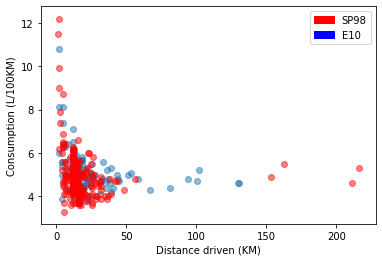

In [151]:
plt.scatter(x=E10msrs['distance'],y=E10msrs['consume'],alpha=0.5)
plt.scatter(x=SP98msrs['distance'],y=SP98msrs['consume'],alpha=0.5,color="red")
plt.xlabel("Distance driven (KM)")
plt.ylabel("Consumption (L/100KM)")

red_patch = mpatches.Patch(color='red', label='SP98')
blue_patch = mpatches.Patch(color='blue', label='E10')
plt.legend(handles=[red_patch,blue_patch])


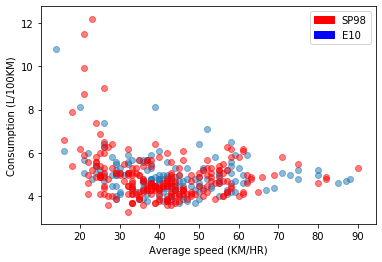

In [152]:
plt.scatter(x=E10msrs['speed'],y=E10msrs['consume'],alpha=0.5)
plt.scatter(x=SP98msrs['speed'],y=SP98msrs['consume'],alpha=0.5,color="red")
plt.xlabel("Average speed (KM/HR)")
plt.ylabel("Consumption (L/100KM)")

red_patch = mpatches.Patch(color='red', label='SP98')
blue_patch = mpatches.Patch(color='blue', label='E10')
plt.legend(handles=[red_patch,blue_patch])

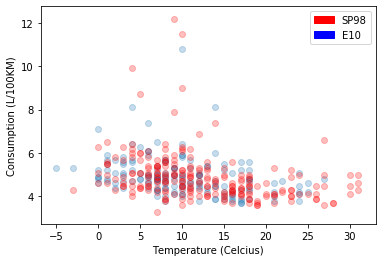

In [153]:
plt.scatter(x=E10msrs['temp_outside'],y=E10msrs['consume'],alpha=0.25)
plt.scatter(x=SP98msrs['temp_outside'],y=SP98msrs['consume'],alpha=0.25,color="red")
plt.xlabel("Temperature (Celcius)")
plt.ylabel("Consumption (L/100KM)")

red_patch = mpatches.Patch(color='red', label='SP98')
blue_patch = mpatches.Patch(color='blue', label='E10')
plt.legend(handles=[red_patch,blue_patch])

### Dumb Method

In [154]:
print(measure.groupby(by="gas_type")['consume'].mean())

gas_type
E10     4.931250
SP98    4.899123
Name: consume, dtype: float64


In [162]:
print("E10:", E10msrs.shape)
print("SP98", SP98msrs.shape)

E10: (160, 12)
SP98 (228, 12)


### Slightly Smarter Method

In [191]:
subE10 = E10msrs[E10msrs['temp_outside']<15]
subE10 = subE10[subE10['temp_outside']>12]
subE10['time'] = subE10['distance'] / subE10['speed']
subE10 = subE10[subE10['time']<0.5]
subE10 = subE10[subE10['time']>0.3]
print(subE10['consume'].mean())
subE10.head()

4.2


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,time
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN,0.400000
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN,0.358333
252,24.9,4.5,53,22.5,14,NaN,E10,0,0,0,NaN,NaN,0.469811
253,17.0,3.9,46,22.5,14,sun,E10,0,0,1,NaN,NaN,0.369565
269,15.4,4.5,50,22.0,14,NaN,E10,0,0,0,NaN,NaN,0.308000


In [190]:
subSP98 = SP98msrs[SP98msrs['temp_outside']<15]
subSP98 = subSP98[subSP98['temp_outside']>12]
subSP98['time'] = subSP98['distance'] / subSP98['speed']
subSP98 = subSP98[subSP98['time']<0.5]
subSP98 = subSP98[subSP98['time']>0.3]
print(subSP98['consume'].mean())
subSP98.head()

4.585714285714286


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,time
200,19.6,4.9,43,21.5,13,NaN,SP98,0,0,0,NaN,NaN,0.455814
214,12.9,4.5,42,20.0,13,NaN,SP98,0,0,0,NaN,NaN,0.307143
216,15.7,4.1,32,22.5,13,NaN,SP98,0,0,0,NaN,NaN,0.490625
296,16.5,4.1,47,22.0,14,NaN,SP98,0,0,0,NaN,NaN,0.351064
307,11.9,5.3,34,22.0,13,NaN,SP98,0,0,0,NaN,NaN,0.350000
